<a href="https://colab.research.google.com/github/sharikav/Fakenewsdetection/blob/master/EnglishFND.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
dfF = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Cleaned_english_fake.csv")
dfT = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Cleaned_english_news.csv")

In [ ]:
dfF


,Unnamed: 0,0
0,0,Ã‚Â If you can hold your breath for 10 seconds...
1,1,"You can beat the virus with warm water, salt o..."
2,2,ChinaÃ¢â‚¬â„¢s whistleblower doctor proposed a...
3,3,"Groceries, chemist and vegetable shops will re..."
4,4,"Ã‚Â Rasam, a soup-like concoction of herbs, ta..."
...,...,...
436,436,As the world fumbles for a cure to the deadly ...
437,437,The message shows an image of a vial with the ...
438,438,"Amid the coronavirus outbreak, a tweet about a..."
439,439,"“Turmeric and lemon are two simple, cheap and ..."


In [ ]:
dfT

,Unnamed: 0,Articles
0,0,Deserves public praise for achievement of Dhar...
1,1,"72 new cases of Coronavirus in Noida, the tota..."
2,2,These NRIs achieved precious moments of life e...
3,3,"Director of ILBS Hospital, Dr. SK Sarin said -..."
4,4,Uttarakhand: Congress in preparation for big m...
...,...,...
398,398,"16-day lockdown in Bihar, state government ann..."
399,399,Four more guards of Rekha's Society Corona pos...
400,400,The number of corona patients reached 110921 i...
401,401,Arvind Kejriwal appealed to the central govern...


## **CONCATENATION OF THE FILES** 

In [ ]:
fake = dfF["0"]
true = dfT["Articles"]

In [ ]:
len(true)

403

In [ ]:
len(fake)

441

In [ ]:
df_fake = pd.DataFrame({'Article':fake})
df_true = pd.DataFrame({'Article':true})
df_true['category'] = 1
df_fake['category'] = 0
df_true.to_csv("NewTrue.csv",index=False)
df_fake.to_csv("NewFake.csv",index=False)
df_fake.head()

,Article,category
0,Ã‚Â If you can hold your breath for 10 seconds...,0
1,"You can beat the virus with warm water, salt o...",0
2,ChinaÃ¢â‚¬â„¢s whistleblower doctor proposed a...,0
3,"Groceries, chemist and vegetable shops will re...",0
4,"Ã‚Â Rasam, a soup-like concoction of herbs, ta...",0


In [ ]:
new_articles = list(df_true['Article'])
category1 = list(df_true['category'])
category2 = list(df_fake['category'])
new_articles.extend(list(df_fake['Article']))
df = pd.DataFrame({'Article':new_articles,'Category':category1 + category2})
df

,Article,Category
0,Deserves public praise for achievement of Dhar...,1
1,"72 new cases of Coronavirus in Noida, the tota...",1
2,These NRIs achieved precious moments of life e...,1
3,"Director of ILBS Hospital, Dr. SK Sarin said -...",1
4,Uttarakhand: Congress in preparation for big m...,1
...,...,...
839,As the world fumbles for a cure to the deadly ...,0
840,The message shows an image of a vial with the ...,0
841,"Amid the coronavirus outbreak, a tweet about a...",0
842,"“Turmeric and lemon are two simple, cheap and ...",0


## **DATA CLEANING**

REMOVES UNWANTED STUFF LIKE

*   PUNCTUATIONS
*   EMOJI'S
*   DATES
*   LINKS
*   EMAILS
*   URLS
*   NUMBERS


In [ ]:
  df = df.replace(r'[.\w]{3,}@[.\w]{5,}','', regex=True)
  df = df.replace(r'https?://[.\w]{3,}','', regex=True)
  df = df.replace(r'www.[.\w]{3,}','', regex=True)
  df = df.replace(r'[0-9]','', regex=True)
  df = df.replace(r'\xa0',' ', regex=True)
  df = df.replace(r'\n',' ', regex=True)
  df = df.replace(r'\t','', regex=True)
  df = df.replace(r'\r','', regex=True)
  df = df.replace(r'\s\s\s','', regex=True)

In [ ]:
df.to_csv("cleaned.csv")   #cleaned file is stored in the csv file

## **DATA PREPROCESSING**

*   Removing punctuation
*   Tokenization
*   Lemmatizing
*   Stopwords
*   Made a new csv file with final data

WE TRIED STEMMING AND LEMMATIZING, AND FOUND THAT LEMMATIZATION GIVES BETTER RESULTS

In [ ]:
import nltk
import re
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
from nltk.stem import WordNetLemmatizer
all_stopwords=stopwords.words('english')
all_stopwords.remove('not')
lemmatizer=WordNetLemmatizer()
for i in range(0,844 ):
    review = re.sub('[^a-zA-Z]', ' ', df['Article'][i])
    review = review.lower()
    review = nltk.word_tokenize(review)
    #ps = PorterStemmer()
    review = [lemmatizer.lemmatize(word) for word in review if not word in all_stopwords]
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
corpus

['deserves public praise achievement dharavi model rahulimage source file photo rahul gandhi new delhi former congress president rahul gandhi saturday praised world health organization dharavi model dealing corona epidemic saying people country deserved special praise success tweeted praised country dharavi model preventing corona virus infection entire team responsible achievement dharavi particular people owe appreciation significantly director general tedros adhanom ghrebeyes said digital press conference geneva friday many example world showing spread corona virus brought control said example italy spain south korea megacity mumbai dense settlement dharavi corona jung full coverage',
 'new case coronavirus noida total number infected image source new case coronavirus pti noida total number infected noida gautam budh nagar district uttar pradesh investigation report till sunday morning confirmed people suffering kovid together people confirmed infected district far district monitori

## **VECTORISATION**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
def vectorize_text(features, max_features):
    vectorizer = TfidfVectorizer( stop_words='english',
                            decode_error='strict',
                            analyzer='word',
                            ngram_range=(1, 2),
                            max_features=max_features
                                 
                            )
    
    feature_vec = vectorizer.fit_transform(features)
    print(vectorizer.get_feature_names)
    return feature_vec.toarray()

In [ ]:
tfidf_features = vectorize_text(corpus,5000)

<bound method CountVectorizer.get_feature_names of TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=5000,
                min_df=1, ngram_range=(1, 2), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)>


In [ ]:
X=tfidf_features

In [ ]:
y = df['Category']

In [ ]:
X.shape

(844, 5000)

TRAIN_TEST_SPLIT

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=0)

# **RUNNING THE MODELS**

---



---



MULTINOMIAL NAIVE_BAYES

In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import  f1_score,precision_score,recall_score
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
y_pred = classifier.predict(X_test)
print("ACCURACY ")
print(accuracy_score(y_pred,y_test))
cm = confusion_matrix(y_test, y_pred)
print("CONFUSION MATRIX")
print(cm)
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
kappa=cohen_kappa_score(y_test,y_pred)
roc=roc_auc_score(y_test,y_pred)
results=pd.DataFrame([['MultinomialNB',acc,prec,rec,f1,kappa,roc,cm]],columns=['Model','Accuracy','Precision','Recall','F1 Score','Cohen_kappa_score','ROC','Confusion_matrix'])

ACCURACY 
0.953405017921147
CONFUSION MATRIX
[[139   4]
 [  9 127]]


In [ ]:
results

,Model,Accuracy,Precision,Recall,F1 Score,Cohen_kappa_score,ROC,Confusion_matrix
0,MultinomialNB,0.953405,0.969466,0.933824,0.951311,0.906667,0.952926,"[[139, 4], [9, 127]]"


LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
logreg = LogisticRegression(C=1e5)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy  on training set: {:.2f}'.format(logreg.score(X_train, y_train)))
print('Accuracy on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
cm = confusion_matrix(y_test, y_pred)
print("CONFUSION MATRIX")
print(cm)
acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
kappa=cohen_kappa_score(y_test,y_pred)
roc=roc_auc_score(y_test,y_pred)
model_results=pd.DataFrame([['Logistic Regression',acc,prec,rec,f1,kappa,roc,cm]],columns=['Model','Accuracy','Precision','Recall','F1 Score','Cohen_kappa_score','ROC','Confusion_matrix'])
results = results.append(model_results,ignore_index=True)


Accuracy  on training set: 1.00
Accuracy on test set: 0.96
CONFUSION MATRIX
[[139   4]
 [  7 129]]


In [ ]:
results

,Model,Accuracy,Precision,Recall,F1 Score,Cohen_kappa_score,ROC,Confusion_matrix
0,MultinomialNB,0.953405,0.969466,0.933824,0.951311,0.906667,0.952926,"[[139, 4], [9, 127]]"
1,Logistic Regression,0.960573,0.969925,0.948529,0.959108,0.921055,0.960279,"[[139, 4], [7, 129]]"


SVM-rbf kernel

In [ ]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = classifier.predict(X_test)
print('Accuracy  on training set: {:.2f}'.format(classifier.score(X_train, y_train)))
print('Accuracy on test set: {:.2f}'.format(classifier.score(X_test, y_test)))
cm = confusion_matrix(y_test, y_pred)
print("CONFUSION MATRIX")
print(cm)
acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
kappa=cohen_kappa_score(y_test,y_pred)
roc=roc_auc_score(y_test,y_pred)
model_results=pd.DataFrame([['SVM RBF',acc,prec,rec,f1,kappa,roc,cm]],columns=['Model','Accuracy','Precision','Recall','F1 Score','Cohen_kappa_score','ROC','Confusion_matrix'])
results = results.append(model_results,ignore_index=True)


Accuracy  on training set: 1.00
Accuracy on test set: 0.96
CONFUSION MATRIX
[[143   0]
 [ 12 124]]


In [ ]:
results

,Model,Accuracy,Precision,Recall,F1 Score,Cohen_kappa_score,ROC,Confusion_matrix
0,MultinomialNB,0.953405,0.969466,0.933824,0.951311,0.906667,0.952926,"[[139, 4], [9, 127]]"
1,Logistic Regression,0.960573,0.969925,0.948529,0.959108,0.921055,0.960279,"[[139, 4], [7, 129]]"
2,SVM RBF,0.956989,1.000000,0.911765,0.953846,0.913738,0.955882,"[[143, 0], [12, 124]]"


SVM-linear kernel

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel="linear")
classifier.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:

y_pred = classifier.predict(X_test)
print('Accuracy  on training set: {:.2f}'.format(classifier.score(X_train, y_train)))
print('Accuracy on test set: {:.2f}'.format(classifier.score(X_test, y_test)))
cm = confusion_matrix(y_test, y_pred)
print("CONFUSION MATRIX")
print(cm)
acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
kappa=cohen_kappa_score(y_test,y_pred)
roc=roc_auc_score(y_test,y_pred)
model_results=pd.DataFrame([['SVM linear',acc,prec,rec,f1,kappa,roc,cm]],columns=['Model','Accuracy','Precision','Recall','F1 Score','Cohen_kappa_score','ROC','Confusion_matrix'])
results = results.append(model_results,ignore_index=True)


Accuracy  on training set: 1.00
Accuracy on test set: 0.96
CONFUSION MATRIX
[[140   3]
 [  9 127]]


In [ ]:
results

,Model,Accuracy,Precision,Recall,F1 Score,Cohen_kappa_score,ROC,Confusion_matrix
0,MultinomialNB,0.953405,0.969466,0.933824,0.951311,0.906667,0.952926,"[[139, 4], [9, 127]]"
1,Logistic Regression,0.960573,0.969925,0.948529,0.959108,0.921055,0.960279,"[[139, 4], [7, 129]]"
2,SVM RBF,0.956989,1.000000,0.911765,0.953846,0.913738,0.955882,"[[143, 0], [12, 124]]"
3,SVM linear,0.956989,0.976923,0.933824,0.954887,0.913831,0.956422,"[[140, 3], [9, 127]]"


PASSIVE AGGRESIVE CLASSIFIER

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier
classifier = PassiveAggressiveClassifier()
classifier.fit(X_train,y_train)

PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None,
                            early_stopping=False, fit_intercept=True,
                            loss='hinge', max_iter=1000, n_iter_no_change=5,
                            n_jobs=None, random_state=None, shuffle=True,
                            tol=0.001, validation_fraction=0.1, verbose=0,
                            warm_start=False)

In [ ]:
y_pred = classifier.predict(X_test)
print('Accuracy  on training set: {:.2f}'.format(classifier.score(X_train, y_train)))
print('Accuracy on test set: {:.2f}'.format(classifier.score(X_test, y_test)))
cm = confusion_matrix(y_test, y_pred)
print("CONFUSION MATRIX")
print(cm)
acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
kappa=cohen_kappa_score(y_test,y_pred)
roc=roc_auc_score(y_test,y_pred)
model_results=pd.DataFrame([['Passive Aggresive',acc,prec,rec,f1,kappa,roc,cm]],columns=['Model','Accuracy','Precision','Recall','F1 Score','Cohen_kappa_score','ROC','Confusion_matrix'])
results = results.append(model_results,ignore_index=True)



Accuracy  on training set: 1.00
Accuracy on test set: 0.97
CONFUSION MATRIX
[[139   4]
 [  4 132]]


In [ ]:
results

,Model,Accuracy,Precision,Recall,F1 Score,Cohen_kappa_score,ROC,Confusion_matrix
0,MultinomialNB,0.953405,0.969466,0.933824,0.951311,0.906667,0.952926,"[[139, 4], [9, 127]]"
1,Logistic Regression,0.960573,0.969925,0.948529,0.959108,0.921055,0.960279,"[[139, 4], [7, 129]]"
2,SVM RBF,0.956989,1.000000,0.911765,0.953846,0.913738,0.955882,"[[143, 0], [12, 124]]"
3,SVM linear,0.956989,0.976923,0.933824,0.954887,0.913831,0.956422,"[[140, 3], [9, 127]]"
4,Passive Aggresive,0.971326,0.970588,0.970588,0.970588,0.942616,0.971308,"[[139, 4], [4, 132]]"


ANN

In [ ]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
early_stop = EarlyStopping(monitor='val_loss',patience=1.5)
N, D = X_train.shape
model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(D,)),
  tf.keras.layers.Dense(300,activation='relu'),
  tf.keras.layers.Dropout(0.7),
  tf.keras.layers.Dense(50,activation='relu'),
  tf.keras.layers.Dropout(0.7),
  #tf.keras.layers.Dense(50,activation='relu'),
  #tf.keras.layers.Dropout(0.7),
  #tf.keras.layers.Dense(50,activation='relu'),
  #tf.keras.layers.Dense(10,activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(Adam(lr=0.005),
              loss='binary_crossentropy',
              metrics=['accuracy'])
his = model.fit(X_train,y_train,epochs=25,verbose=1,shuffle=1,validation_split=0.1,callbacks=[early_stop])

Epoch 1/25
16/16 [==============================] - 0s 14ms/step - loss: 0.5844 - accuracy: 0.7323 - val_loss: 0.3231 - val_accuracy: 0.9298
Epoch 2/25
16/16 [==============================] - 0s 8ms/step - loss: 0.1745 - accuracy: 0.9547 - val_loss: 0.0867 - val_accuracy: 0.9474
Epoch 3/25
16/16 [==============================] - 0s 7ms/step - loss: 0.0302 - accuracy: 0.9921 - val_loss: 0.1082 - val_accuracy: 0.9474
Epoch 4/25
16/16 [==============================] - 0s 7ms/step - loss: 0.0096 - accuracy: 0.9980 - val_loss: 0.1235 - val_accuracy: 0.9474


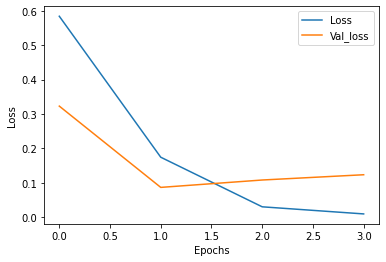

In [ ]:
import matplotlib.pyplot as plt
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.xlabel("Epochs")
plt.legend(["Loss","Val_loss"])
plt.ylabel("Loss")
plt.savefig('loss_plot.png', dpi=300, bbox_inches='tight')
plt.show()

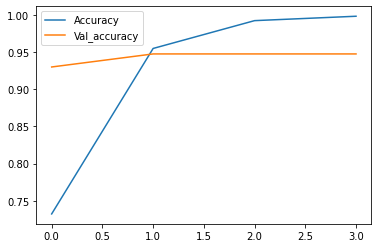

In [ ]:
plt.plot(his.history['accuracy'], label='train')
plt.plot(his.history['val_accuracy'], label='test')

plt.legend(["Accuracy","Val_accuracy"])
plt.savefig('accuracy_plot.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
results.to_csv("finalresults2.csv")

In [ ]:
# demonstration of calculating metrics for a neural network model using sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
 
trainX, trainy, testX, testy = X_train,y_train,X_test,y_test 
yhat_probs = (model.predict(testX) > 0.5).astype("int32")
# predict crisp classes for test set
yhat_classes = model.predict_classes(testX, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]
 
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(testy, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(testy, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(testy, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(testy, yhat_classes)
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(testy, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(testy, yhat_probs)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(testy, yhat_classes)
print(matrix)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Accuracy: 0.971326
Precision: 0.963768
Recall: 0.977941
F1 score: 0.970803
Cohens kappa: 0.942637
ROC AUC: 0.971488
[[138   5]
 [  3 133]]


In [ ]:
model_results=pd.DataFrame([['ANN2',accuracy,precision,recall,f1,kappa,auc,matrix]],columns=['Model','Accuracy','Precision','Recall','F1 Score','Cohen_kappa_score','ROC','Confusion_matrix'])
results = results.append(model_results,ignore_index=True)

In [ ]:
results

,Model,Accuracy,Precision,Recall,F1 Score,Cohen_kappa_score,ROC,Confusion_matrix
0,MultinomialNB,0.953405,0.969466,0.933824,0.951311,0.906667,0.952926,"[[139, 4], [9, 127]]"
1,Logistic Regression,0.960573,0.969925,0.948529,0.959108,0.921055,0.960279,"[[139, 4], [7, 129]]"
2,SVM RBF,0.956989,1.000000,0.911765,0.953846,0.913738,0.955882,"[[143, 0], [12, 124]]"
3,SVM linear,0.956989,0.976923,0.933824,0.954887,0.913831,0.956422,"[[140, 3], [9, 127]]"
4,Passive Aggresive,0.971326,0.970588,0.970588,0.970588,0.942616,0.971308,"[[139, 4], [4, 132]]"
5,ANN2,0.971326,0.963768,0.977941,0.970803,0.942637,0.971488,"[[138, 5], [3, 133]]"


In [ ]:
def build_corpus(data):
    "Creates a list of lists containing words from each sentence"
    corpus = []
    for col in data:
        
            corpus.append(col.split())

    return corpus

corpus1 = build_corpus(corpus)
corpus1[0:2]

[['deserves',
  'public',
  'praise',
  'achievement',
  'dharavi',
  'model',
  'rahulimage',
  'source',
  'file',
  'photo',
  'rahul',
  'gandhi',
  'new',
  'delhi',
  'former',
  'congress',
  'president',
  'rahul',
  'gandhi',
  'saturday',
  'praised',
  'world',
  'health',
  'organization',
  'dharavi',
  'model',
  'dealing',
  'corona',
  'epidemic',
  'saying',
  'people',
  'country',
  'deserved',
  'special',
  'praise',
  'success',
  'tweeted',
  'praised',
  'country',
  'dharavi',
  'model',
  'preventing',
  'corona',
  'virus',
  'infection',
  'entire',
  'team',
  'responsible',
  'achievement',
  'dharavi',
  'particular',
  'people',
  'owe',
  'appreciation',
  'significantly',
  'director',
  'general',
  'tedros',
  'adhanom',
  'ghrebeyes',
  'said',
  'digital',
  'press',
  'conference',
  'geneva',
  'friday',
  'many',
  'example',
  'world',
  'showing',
  'spread',
  'corona',
  'virus',
  'brought',
  'control',
  'said',
  'example',
  'italy',
  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if sys.path[0] == '':


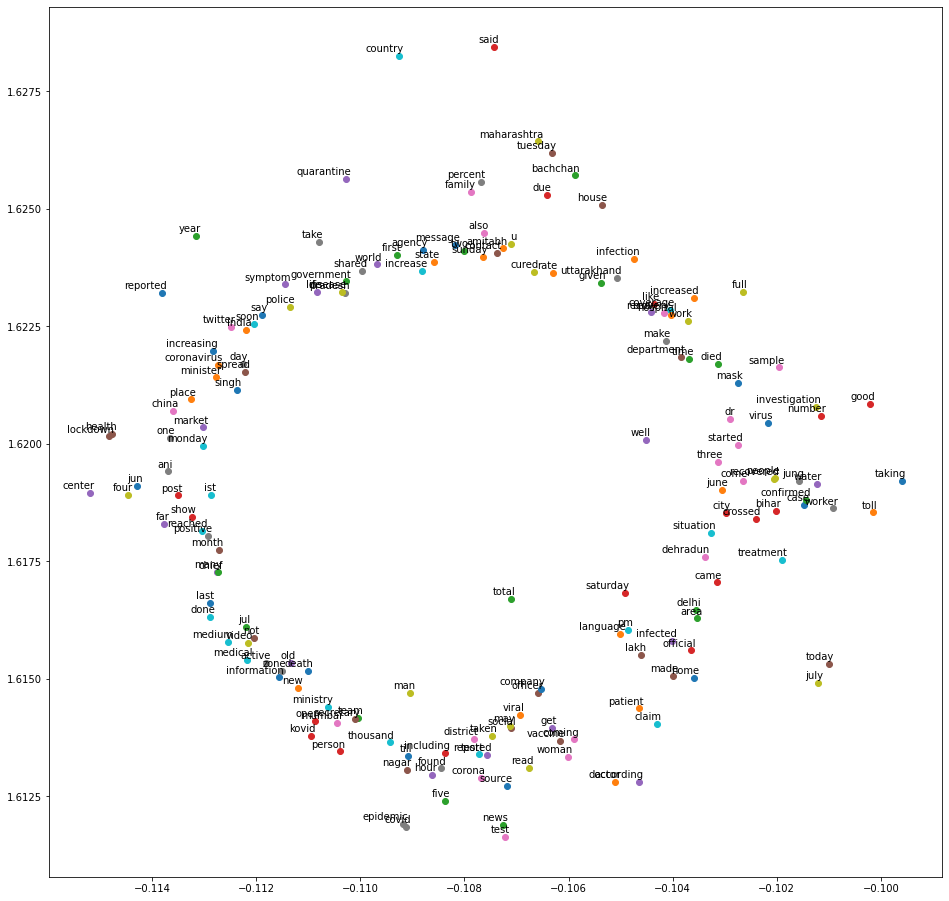

In [ ]:
from gensim.models import word2vec

from sklearn.manifold import TSNE
#model = word2vec.Word2Vec(corpus1, size=100, window=20, min_count=200, workers=4)
model = word2vec.Word2Vec(corpus1, size=100, window=20, min_count=100, workers=4)
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)

    tsne_model = TSNE(perplexity=500, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])

    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.savefig('bow1.png', dpi=300, bbox_inches='tight')
    plt.show()
tsne_plot(model)

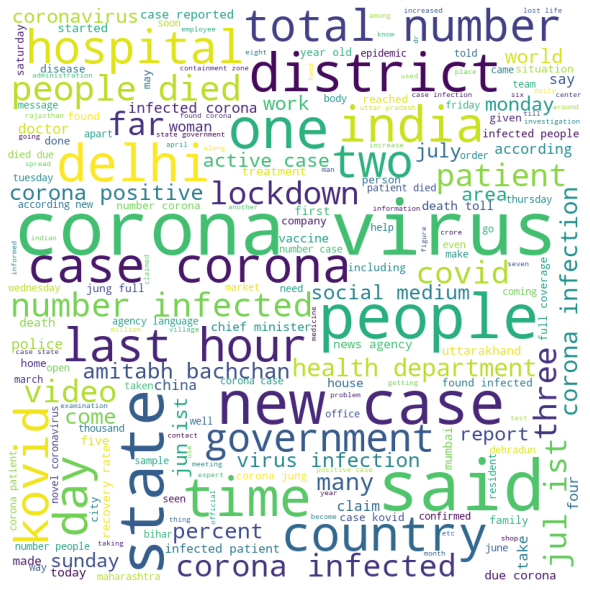

In [ ]:
from wordcloud import WordCloud, STOPWORDS 
cop=' '.join(corpus)
stopwords = set(STOPWORDS) 
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(cop) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [ ]:
all_stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
X_train = df['Article']
Y_train = df['Category']

In [ ]:
X_train = df['Article']
Y_train = df['Category']
from sklearn.pipeline import Pipeline
from sklearn import linear_model
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer(norm='l2')),
    ('clf', linear_model.LogisticRegression(C=1e5)),
])

In [ ]:
pipeline.fit(X_train, Y_train)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=Non...
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 LogisticRegression(C=100000.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1

In [ ]:
pipeline.predict(["flynn hillary clinton big woman campus breitbart daniel j flynnever get feeling life circle roundabout rather head straight line toward intended destination hillary clinton remains big woman campus leafy liberal wellesley massachusetts everywhere else vote likely inauguration dress remainder day way miss havisham forever wore wedding dress speaking great expectations hillary rodham overflowed 48 year ago first addressed wellesley graduating class the president college informed gathered 1969 student needed debate far i could ascertain spokesman kind like democratic primary 2016 minus term unknown even seven sisters school i glad miss adams made clear i speaking today u 400 u miss rodham told classmate after appointing edger bergen charlie mccarthys mortimer snerds attendance bespectacled granny glass awarding matronly wisdom least john lennon wisdom took issue previous speaker despite becoming first win election seat u s senate since reconstruction edward brooke came criticism calling empathy goal protestors criticized tactic though clinton senior thesis saul alinsky lamented black power demagogue elitist arrogance repressive intolerance within new left similar word coming republican necessitated brief rebuttal trust rodham ironically observed 1969 one word i asked class rehearsal wanted say everyone came said talk trust talk lack trust u way feel others talk trust bust what say what say feeling permeates generation perhaps even understood distrusted the trust bust certainly busted clintons 2016 plan she certainly even understand people distrusted after whitewater travelgate vast conspiracy benghazi missing email clinton found distrusted voice friday there load compromising road broadening political horizon and distrust american people trump edged 48 percent 38 percent question immediately prior novembers election stood major reason closing horizon clinton described vanquisher supporter embracing lie con alternative fact assault truth reason she failed explain american people chose lie truth as history major among today know well people power invent fact attack question mark beginning end free society offered that hyperbole like many people emerge 1960s hillary clinton embarked upon long strange trip from high school goldwater girl wellesley college republican president democratic politician clinton drank time place gave degree more significantly went idealist cynic comparison two wellesley commencement address show way back lamented long leader viewed politics art possible challenge practice politics art making appears impossible possible now big woman campus odd woman white house wonder current station even possible why arent i 50 point ahead asked september in may asks isnt president the woman famously dubbed congenital liar bill safire concludes lie mind getting stood election day like finding jilted bride wedding day inspires dangerous delusion"])

array([0])

In [ ]:
pipeline.predict(["The number of people infected with this deadly virus has increased to 85,975 in the state after 3,007 new cases of coronavirus infection were reported in Maharashtra on Sunday. A health official said that after the death of 91 more people due to infection in the state, the death toll in the state has increased to 3,060. The official said that the cases of corona virus infection in Maharashtra have exceeded the cases of China. There are 83,036 confirmed cases of infection in China. 39,314 people have recovered in Maharashtra, 3,060 people have died and 43,591 peopleare undergoing treatment."])

array([1])

In [ ]:
pipeline.predict(["Coronavirus update: India has recorded over 34,884 Covid-19 cases in the last 24 hours, taking the total number of coronaivrus cases to 1,040,746. With over 670 deaths on Friday, death toll has now risen to 26,291. With a surge in Covid-19 cases in Bihar, West Bengal, Assam and Odisha, the Union health ministry has asked these states to make renewed efforts to suppress transmission of the virus and keep case fatality rate below one per cent. In a first, Kerala chief minister Pinarayi Vijayan on Friday confirmed community spread occurring in two coastal villages in the capital city, Thiruvananthapuram."])

array([1])

In [ ]:

df

,Article,Category
0,Deserves public praise for achievement of Dhar...,1
1,"new cases of Coronavirus in Noida, the total ...",1
2,These NRIs achieved precious moments of life e...,1
3,"Director of ILBS Hospital, Dr. SK Sarin said -...",1
4,Uttarakhand: Congress in preparation for big m...,1
...,...,...
839,As the world fumbles for a cure to the deadly ...,0
840,The message shows an image of a vial with the ...,0
841,"Amid the coronavirus outbreak, a tweet about a...",0
842,"“Turmeric and lemon are two simple, cheap and ...",0


In [ ]:
import numpy 

X = numpy.array(list(corpus))

In [ ]:
y = numpy.array(list(df['Category']))

In [ ]:
from sklearn.model_selection import train_test_split
df_train, df_test, Ytrain, Ytest = train_test_split(X, y, test_size=0.33)

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D, SpatialDropout1D, Conv1D, MaxPooling1D
from tensorflow.keras.layers import LSTM, Embedding
from tensorflow.keras.models import Model
MAX_VOCAB_SIZE = 20000
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(df_train)
sequences_train = tokenizer.texts_to_sequences(df_train)
sequences_test = tokenizer.texts_to_sequences(df_test)

In [ ]:
len(tokenizer.word_index)

7893

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_train = pad_sequences(sequences_train)
print('Shape of data train tensor:', data_train.shape)

# get sequence length
T = data_train.shape[1]

Shape of data train tensor: (565, 1348)


In [ ]:
data_test = pad_sequences(sequences_test, maxlen=T)
print('Shape of data test tensor:', data_test.shape)

Shape of data test tensor: (279, 1348)


In [ ]:
data_test

array([[   0,    0,    0, ...,  192, 6998, 6999],
       [   0,    0,    0, ...,   91,  188,  441],
       [   0,    0,    0, ...,  409,  338,   44],
       ...,
       [   0,    0,    0, ...,    2,   16,  148],
       [   0,    0,    0, ...,   32,    6,   56],
       [   0,    0,    0, ...,    6,  373,   26]], dtype=int32)

Training model...
Epoch 1/20
18/18 [==============================] - 4s 227ms/step - loss: 0.6845 - accuracy: 0.5504 - val_loss: 0.5949 - val_accuracy: 0.8459
Epoch 2/20
18/18 [==============================] - 3s 191ms/step - loss: 0.6027 - accuracy: 0.7717 - val_loss: 0.5328 - val_accuracy: 0.9247
Epoch 3/20
18/18 [==============================] - 3s 191ms/step - loss: 0.3850 - accuracy: 0.9097 - val_loss: 0.2710 - val_accuracy: 0.9211
Epoch 4/20
18/18 [==============================] - 3s 190ms/step - loss: 0.2349 - accuracy: 0.9310 - val_loss: 0.2519 - val_accuracy: 0.9570
Epoch 5/20
18/18 [==============================] - 3s 191ms/step - loss: 0.1876 - accuracy: 0.9487 - val_loss: 0.1702 - val_accuracy: 0.9534
Epoch 6/20
18/18 [==============================] - 3s 189ms/step - loss: 0.1151 - accuracy: 0.9699 - val_loss: 0.1749 - val_accuracy: 0.9677
Epoch 7/20
18/18 [==============================] - 3s 189ms/step - loss: 0.1425 - accuracy: 0.9451 - val_loss: 0.1659 - val_accur

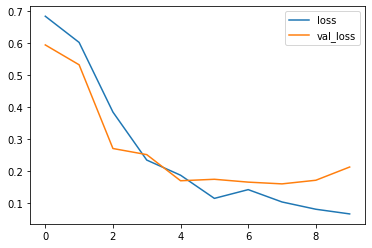

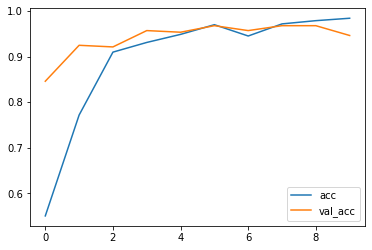

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

early_stop = EarlyStopping(monitor='val_loss',patience=2)
# Create the model

V= len(tokenizer.word_index)
# We get to choose embedding dimensionality
D = 20

# Hidden state dimensionality
M = 100

# Note: we actually want to the size of the embedding to (V + 1) x D,
# because the first index starts from 1 and not 0.
# Thus, if the final index of the embedding matrix is V,
# then it actually must have size V + 1.

i = Input(shape=(T,))
x = Embedding(V + 1, D)(i)
x = SpatialDropout1D(0.2)(x)
x = LSTM(M, return_sequences=True)(x)
x = Dense(40,activation='relu')(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1, activation='sigmoid')(x)


model = Model(i, x)
# Compile and fit
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


print('Training model...')
r = model.fit(
  data_train,
  Ytrain,
  epochs=20,
  validation_data=(data_test, Ytest),
  callbacks=[early_stop]
  #validation_split=0.1
)
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

In [ ]:
data_train.shape

(565, 1348)

Training model...
Epoch 1/10
18/18 [==============================] - 0s 27ms/step - loss: 0.6803 - accuracy: 0.5823 - val_loss: 0.6625 - val_accuracy: 0.6416
Epoch 2/10
18/18 [==============================] - 0s 18ms/step - loss: 0.6146 - accuracy: 0.6673 - val_loss: 0.5489 - val_accuracy: 0.7312
Epoch 3/10
18/18 [==============================] - 0s 18ms/step - loss: 0.3953 - accuracy: 0.8850 - val_loss: 0.3082 - val_accuracy: 0.8710
Epoch 4/10
18/18 [==============================] - 0s 18ms/step - loss: 0.2076 - accuracy: 0.9327 - val_loss: 0.1961 - val_accuracy: 0.9283
Epoch 5/10
18/18 [==============================] - 0s 18ms/step - loss: 0.1331 - accuracy: 0.9628 - val_loss: 0.1593 - val_accuracy: 0.9498
Epoch 6/10
18/18 [==============================] - 0s 18ms/step - loss: 0.1156 - accuracy: 0.9717 - val_loss: 0.1281 - val_accuracy: 0.9677
Epoch 7/10
18/18 [==============================] - 0s 17ms/step - loss: 0.1114 - accuracy: 0.9717 - val_loss: 0.1253 - val_accuracy: 0.

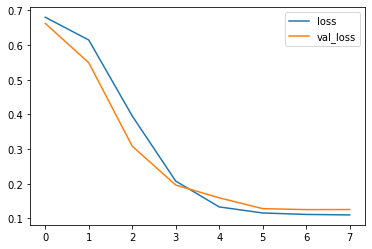

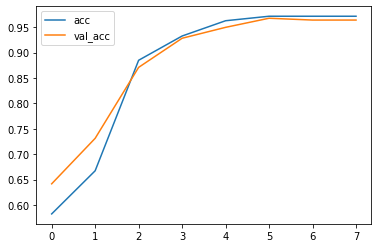

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

early_stop = EarlyStopping(monitor='accuracy',patience=2)
i = Input(shape=(T,))
x = Embedding(V + 1, D)(i)
x = Conv1D(32, 3, activation='relu')(x)
x = MaxPooling1D(3)(x)
x = Conv1D(64, 3, activation='relu')(x)
x = MaxPooling1D(3)(x)
x = Conv1D(128, 3, activation='relu')(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(i, x)

model.compile(Adam(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

print('Training model...')
r = model.fit(
  data_train,
  Ytrain,
  epochs=10,
  validation_data=(data_test, Ytest), callbacks=[early_stop]
)
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

Loaded 400000 word vectors.
Training model...
Epoch 1/20
18/18 [==============================] - 4s 226ms/step - loss: 0.5965 - accuracy: 0.7221 - val_loss: 0.4351 - val_accuracy: 0.8961
Epoch 2/20
18/18 [==============================] - 3s 193ms/step - loss: 0.3607 - accuracy: 0.8690 - val_loss: 0.1933 - val_accuracy: 0.9319
Epoch 3/20
18/18 [==============================] - 3s 193ms/step - loss: 0.2834 - accuracy: 0.9027 - val_loss: 0.1918 - val_accuracy: 0.9319
Epoch 4/20
18/18 [==============================] - 3s 193ms/step - loss: 0.2142 - accuracy: 0.9310 - val_loss: 0.1821 - val_accuracy: 0.9319
Epoch 5/20
18/18 [==============================] - 3s 192ms/step - loss: 0.1852 - accuracy: 0.9345 - val_loss: 0.1498 - val_accuracy: 0.9427
Epoch 6/20
18/18 [==============================] - 3s 193ms/step - loss: 0.1576 - accuracy: 0.9487 - val_loss: 0.1177 - val_accuracy: 0.9606
Epoch 7/20
18/18 [==============================] - 4s 195ms/step - loss: 0.1327 - accuracy: 0.9540 - 

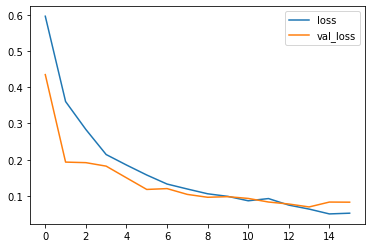

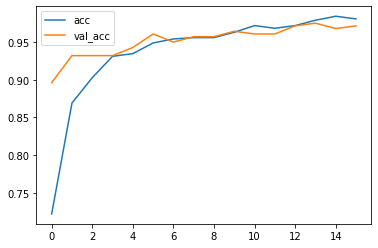

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from numpy import array
from numpy import asarray
import numpy
embeddings_index = dict()
V= len(tokenizer.word_index)
f = open('/content/drive/My Drive/Colab Notebooks/glove.6B.100d.txt')
for line in f:
	values = line.split()
	word = values[0]
	coefs = asarray(values[1:], dtype='float32')
	embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))
# create a weight matrix for words in training docs
embedding_matrix = numpy.zeros((V+1, 100))
for word, i in tokenizer.word_index.items():
	embedding_vector = embeddings_index.get(word)
	if embedding_vector is not None:
		embedding_matrix[i] = embedding_vector

early_stop = EarlyStopping(monitor='val_loss',patience=2)
# Create the model


# We get to choose embedding dimensionality
D = 100

# Hidden state dimensionality
M = 100

# Note: we actually want to the size of the embedding to (V + 1) x D,
# because the first index starts from 1 and not 0.
# Thus, if the final index of the embedding matrix is V,
# then it actually must have size V + 1.

i = Input(shape=(T,))
x = Embedding(V + 1, D, weights=[embedding_matrix], trainable=False)(i)
x = SpatialDropout1D(0.2)(x)
x = LSTM(M, return_sequences=True)(x)
x = Dense(40,activation='relu')(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1, activation='sigmoid')(x)


model = Model(i, x)
# Compile and fit
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


print('Training model...')
r = model.fit(
  data_train,
  Ytrain,
  epochs=20,
  validation_data=(data_test, Ytest),
  callbacks=[early_stop]
  #validation_split=0.1
)
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

In [ ]:
plt.savefig('bow1.png', dpi=300, bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

In [ ]:
y_pred= numpy.argmax(model.predict(data_test),axis=1)

In [ ]:
model.predict(data_test)

array([[9.3443273e-03],
       [9.9870968e-01],
       [9.6881169e-01],
       [9.9926573e-01],
       [3.3997405e-02],
       [1.3181135e-03],
       [9.9218637e-03],
       [2.2980999e-03],
       [9.9978393e-01],
       [9.9991810e-01],
       [2.9748331e-03],
       [9.9930167e-01],
       [9.9935120e-01],
       [1.6441435e-03],
       [9.9925894e-01],
       [9.9983919e-01],
       [9.9996424e-01],
       [9.9971634e-01],
       [6.1838032e-04],
       [2.0676564e-02],
       [1.0180939e-02],
       [9.9948835e-01],
       [2.2851456e-02],
       [9.9744201e-01],
       [9.9986410e-01],
       [9.9990189e-01],
       [2.4770509e-01],
       [9.9998057e-01],
       [2.3854962e-02],
       [1.3460358e-02],
       [9.9385828e-01],
       [9.9996662e-01],
       [3.0340066e-02],
       [9.9983573e-01],
       [9.8952150e-01],
       [4.8147187e-02],
       [9.9384862e-01],
       [9.9985659e-01],
       [2.8830452e-02],
       [4.6611048e-02],
       [2.7250189e-01],
       [1.009728

In [ ]:
yhat_probs = (model.predict(data_test) > 0.7).astype("int32")

In [ ]:
ypred=yhat_probs.flatten()

In [ ]:
yhat_probs

array([[0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
    

In [ ]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
Ytest

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0])

In [ ]:
data_test

array([[   0,    0,    0, ...,  192, 6998, 6999],
       [   0,    0,    0, ...,   91,  188,  441],
       [   0,    0,    0, ...,  409,  338,   44],
       ...,
       [   0,    0,    0, ...,    2,   16,  148],
       [   0,    0,    0, ...,   32,    6,   56],
       [   0,    0,    0, ...,    6,  373,   26]], dtype=int32)

In [ ]:
matrix = confusion_matrix(ypred, Ytest)
print(matrix)

[[154   4]
 [  2 119]]


In [ ]:
yhat_probs = (model.predict(data_test) > 0.65).astype("int32")
ypred= yhat_probs.flatten()
matrix = confusion_matrix(ypred, Ytest)
print(matrix)

[[153   4]
 [  3 119]]


In [ ]:
text="Coronavirus India News Live Updates: India reported 37,148 cases and 587 deaths in the last 24 hours, taking the total number of coronavirus infections to 11,55,191 including 28084 casualties, 4,02,529 active cases and 7,24,578 people who have been treated and discharged so far, according to the data by Ministry of Health and Family Welfare. Globally, 14,703,293 people have been infected, 609,887 have died and 8,290,431 have recovered so far. The Health Ministry and the Indian Council of Medical Research (ICMR) have suggested a set of short-term and medium-term actions for state governments to enhance the country’s Covid-19 testing capacity. AIIMS Director Dr Randeep Guleria, who is part of the core team monitoring the pandemic in India, has told The Indian Express that data from the national capital suggests that the Covid curve is flattening and Delhi “may have crossed the peak”. Meanwhile, the Centre has written to all states and union territories warning against the use of N-95 masks with valved respirators by people, saying these do not prevent the virus from spreading out and are “detrimental” to the measures adopted for its containment. Coming to the vaccine-related news, a coronavirus vaccine the University of Oxford is developing with AstraZeneca Plc has shown promising results in early human testing, a sign of progress in the high-stakes pursuit of a shot to defeat the pathogen. The vaccine increased levels of both protective neutralising antibodies and immune T-cells that target the virus, according to the study organisers. The results of the study were published in the medical journal The Lancet."

In [ ]:
text="vishwajeet got oreo cake corona"

In [ ]:
import nltk
import re
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:

all_stopwords=stopwords.words('english')
all_stopwords.remove('not')
print(all_stopwords)
def process(text):
  text= text.lower()
  text= nltk.word_tokenize(text)
  text = [lemmatizer.lemmatize(word) for word in text if not word in (all_stopwords)]
  text=' '.join(text)
  print(text)
  text = tokenizer.texts_to_sequences([text])
  text = pad_sequences(text, maxlen=1348)
  return text
  

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'only', 'own', 'same', 'so', 'than', 'too', '

In [ ]:
process(text)

corona virus vaccine found


array([[ 0,  0,  0, ...,  4, 77, 21]], dtype=int32)

In [ ]:
text

'corona virus vaccine not found '

In [ ]:
process(text)

corona virus vaccine not found


array([[ 0,  0,  0, ..., 77, 14, 21]], dtype=int32)

In [ ]:
print(model.predict([process(text)]))

vishwajeet got oreo cake corona
[[0.84801805]]
